In [10]:
import tensorflow as tf

In [11]:
print(tf.__version__)

2.10.1


In [12]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_test.shape

(10000, 28, 28)

In [15]:
#tworzenie modelu sieci neuronowej
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [16]:
import matplotlib.pyplot as plt
import numpy as np

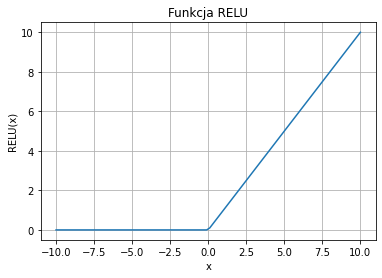

In [17]:
x = np.linspace(-10,10,100)
y = np.maximum(0,x)
plt.figure()
plt.plot(x,y)
plt.title("Funkcja RELU")
plt.xlabel("x")
plt.ylabel("RELU(x)")
plt.grid()
plt.show()

In [27]:
#kompilacja modelu -> deklaracja propagacji wstecznej
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0201 - accuracy: 0.9930
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0202 - accuracy: 0.9929
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0208 - accuracy: 0.9927
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0202 - accuracy: 0.9927
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0187 - accuracy: 0.9936
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - accuracy: 0.9939
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0190 - accuracy: 0.9936
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9938
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0188 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

In [28]:
#ocena modelu
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)
print(f'strata: {test_loss}, dokładnośc: {test_acc}')

313/313 - 1s - loss: 0.1007 - accuracy: 0.9811 - 645ms/epoch - 2ms/step
strata: 0.10065809637308121, dokładnośc: 0.9811000227928162


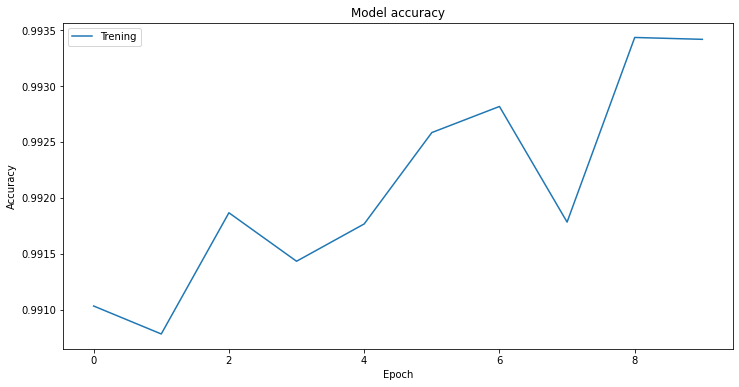

In [26]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Trening'],loc='upper left')
plt.show()